<a href="https://colab.research.google.com/github/InesAgudoMartin/APRENDIZAJE_AUTOMATICO_23_24/blob/main/GR_PR%C3%81CTICA_2_MINERIA_DE_DATOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PRACTICA 2 - MINERÍA DE DATOS

In [ ]:
!pip install ydata-profiling
!pip install apyori

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 393.5/393.5 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 88.4 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=d4fb3bbe7d9fee6f3b5108d80b629eba2e6990b81b7df8365a545a8b127d8b0f
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin
  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5954 sha256=124b14633b2a4fd257d0d739549c8b6796325835608b53be0da5a1468a0e11f5
  St

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

from apyori import apriori

# Usamos esto para que se nos muestren todos los atributos
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Carga de dataset en crudo, usando el método read_csv method.
# Más info: https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html
%cd /content/drive/MyDrive/MINERIA DE DATOS/PRACTICA 2

data_file_path = 'firefighters_operations_madrid.csv'

data = pd.read_csv(data_file_path,  sep=';')

[Errno 2] No such file or directory: '/content/drive/MyDrive/MINERIA DE DATOS/PRACTICA 2'
/content


In [ ]:
# El tipo de datos en el que lo hemos cargado es un DataFrame object.
# Más info: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html

print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
# Podemos visualizar el contenido

data

,year,month,district,fires,construction_damages,rescues_and_savings,water_damages,various_incidents,non_intervention_calls,various_services,risk
0,2017,Agosto,CENTRO,47,20,44,26,34,19,9,199.0
1,2017,Agosto,ARGANZUELA,24,5,20,15,28,13,3,108.0
2,2017,Agosto,RETIRO,11,7,12,9,30,3,1,73.0
3,2017,Agosto,SALAMANCA,19,12,20,17,32,4,1,105.0
4,2017,Agosto,CHAMARTIN,15,6,21,8,34,11,2,97.0
5,2017,Agosto,TETUAN,18,10,27,13,20,14,1,103.0
6,2017,Agosto,CHAMBERI,17,11,22,6,18,8,1,83.0
7,2017,Agosto,FUENCARRAL,34,3,25,7,38,15,2,124.0
8,2017,Agosto,MONCLOA,16,1,25,6,27,7,2,84.0
9,2017,Agosto,LATINA,24,4,29,19,33,8,1,118.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936 entries, 0 to 1935
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    1936 non-null   int64  
 1   month                   1936 non-null   object 
 2   district                1936 non-null   object 
 3   fires                   1936 non-null   int64  
 4   construction_damages    1936 non-null   int64  
 5   rescues_and_savings     1936 non-null   int64  
 6   water_damages           1936 non-null   int64  
 7   various_incidents       1936 non-null   int64  
 8   non_intervention_calls  1936 non-null   int64  
 9   various_services        1936 non-null   int64  
 10  risk                    1672 non-null   float64
dtypes: float64(1), int64(8), object(2)
memory usage: 166.5+ KB


In [ ]:
# Descripción de cada atributo

profile = ProfileReport(
    data,
    title="firefighters",
    html={'style':{'full_width':True}},
    sort= None)

profile.to_file(output_file = 'firefighters_eda.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# valores por año y valores de risk faltantes por año
value_years = data['year'].value_counts()
missing_years = data[data['risk'].isnull()]['year'].value_counts()

print('Valores por año', value_years)
print('Faltantes por año', missing_years)

Valores por año year
2022    526
2023    264
2024    264
2019    259
2018    258
2021    258
2017    107
Name: count, dtype: int64
Faltantes por año year
2024    264
Name: count, dtype: int64


In [ ]:
# Eliminar los valores del 2024 a los que les falta el riesgo
data.dropna(subset=['risk'], inplace=True)

In [ ]:

# Ver información del DataFrame después de la limpieza
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1672 entries, 0 to 1671
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    1672 non-null   int64  
 1   month                   1672 non-null   object 
 2   district                1672 non-null   object 
 3   fires                   1672 non-null   int64  
 4   construction_damages    1672 non-null   int64  
 5   rescues_and_savings     1672 non-null   int64  
 6   water_damages           1672 non-null   int64  
 7   various_incidents       1672 non-null   int64  
 8   non_intervention_calls  1672 non-null   int64  
 9   various_services        1672 non-null   int64  
 10  risk                    1672 non-null   float64
dtypes: float64(1), int64(8), object(2)
memory usage: 156.8+ KB


In [ ]:
# Mostrar los valores únicos en la columna 'month'
print(data['month'].unique())

['Agosto' 'Septiembre' 'Octubre' 'Noviembre' 'Diciembre' 'Enero' 'Febrero'
 'Marzo' 'Abril' 'Mayo' 'Junio' 'Julio' 'diciembre' 'noviembre' 'octubre'
 'septiembre' 'agosto' 'julio' 'junio' 'mayo' 'abril' 'marzo' 'febrero'
 'enero']


In [ ]:
# Reemplazar nombres de meses para estandarización
data['month'].replace(
    ['enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio', 'julio', 'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre'],
    ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'],
    inplace=True
)

<ipython-input-17-6f79abf2c82e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['month'].replace(


In [ ]:
# Verificar los cambios en los valores únicos de 'month'
print(data['month'].unique())

['Agosto' 'Septiembre' 'Octubre' 'Noviembre' 'Diciembre' 'Enero' 'Febrero'
 'Marzo' 'Abril' 'Mayo' 'Junio' 'Julio']


In [ ]:
# Función para categorizar una columna según umbrales dados
def categorize_column(column, none_max, low_max, medium_max):
    categories = []
    for value in column:
        if value <= none_max:
            categories.append('None_' + column.name)
        elif value <= low_max:
            categories.append('Low_' + column.name)
        elif value <= medium_max:
            categories.append('Medium_' + column.name)
        else:
            categories.append('High_' + column.name)
    return categories


# Aplicar la categorización a varias columnas del DataFrame
data["fires_category"] = categorize_column(data["fires"], 0, 4, 10)
data["construction_damages_category"] = categorize_column(data["construction_damages"], 0, 4, 10)
data["rescues_and_savings_category"] = categorize_column(data["rescues_and_savings"], 0, 4, 10)
data["water_damages_category"] = categorize_column(data["water_damages"], 0, 4, 10)
data["various_incidents_category"] = categorize_column(data["various_incidents"], 0, 4, 10)
data["non_intervention_calls_category"] = categorize_column(data["non_intervention_calls"], 0, 4, 10)
data["various_services_category"] = categorize_column(data["various_services"], 0, 4, 10)
data["risk_category"] = categorize_column(data["risk"], 0, 10, 100)

In [ ]:
# Creación de la lista de transacciones
data_transactions = data.drop(columns=['fires', 'construction_damages', 'rescues_and_savings',
                                       'water_damages', 'various_incidents', 'non_intervention_calls',
                                       'various_services', 'risk'], inplace=False)

data_transactions['year'] = data_transactions['year'].astype(str)

# Mostrar las primeras filas de data_transactions
print(data_transactions.head())

# Convertir el DataFrame a una lista de listas
list_transactions = data_transactions.to_numpy().tolist()

# Mostrar una parte de la lista de transacciones
print(list_transactions[1:5][:])  # Mostrar los primeros 5 elementos

# Verificar el tipo de la lista generada
print(type(list_transactions))

# Imprimir la cantidad total de transacciones en la lista
print(len(list_transactions))
print(len(list_transactions[0]))


   year   month    district fires_category construction_damages_category rescues_and_savings_category water_damages_category various_incidents_category non_intervention_calls_category various_services_category risk_category
0  2017  Agosto      CENTRO     High_fires     High_construction_damages     High_rescues_and_savings     High_water_damages     High_various_incidents     High_non_intervention_calls   Medium_various_services     High_risk
1  2017  Agosto  ARGANZUELA     High_fires   Medium_construction_damages     High_rescues_and_savings     High_water_damages     High_various_incidents     High_non_intervention_calls      Low_various_services     High_risk
2  2017  Agosto      RETIRO     High_fires   Medium_construction_damages     High_rescues_and_savings   Medium_water_damages     High_various_incidents      Low_non_intervention_calls      Low_various_services   Medium_risk
3  2017  Agosto   SALAMANCA     High_fires     High_construction_damages     High_rescues_and_savings   

## Estudio k = 1

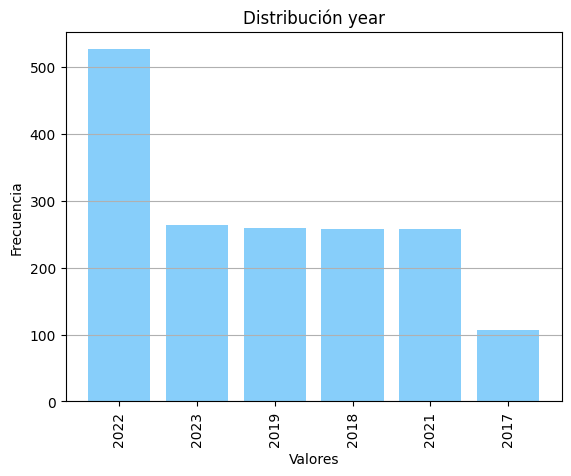

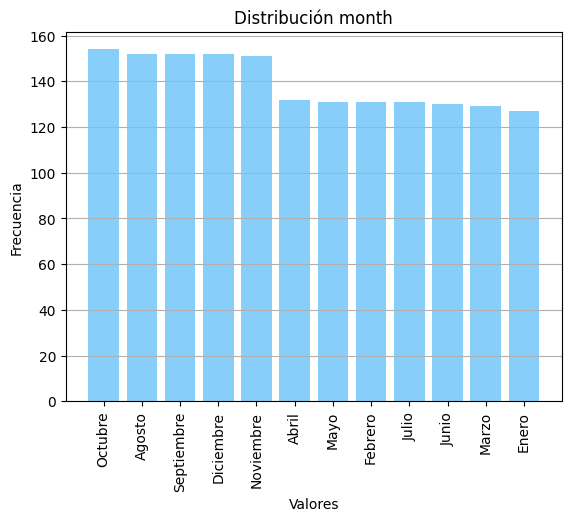

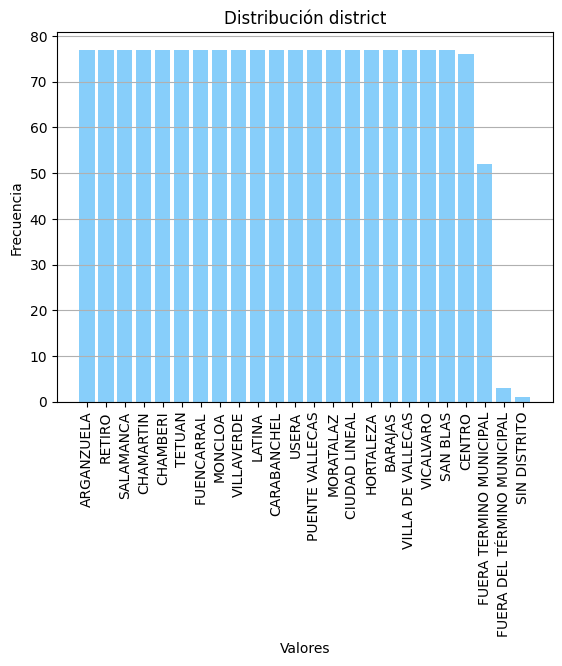

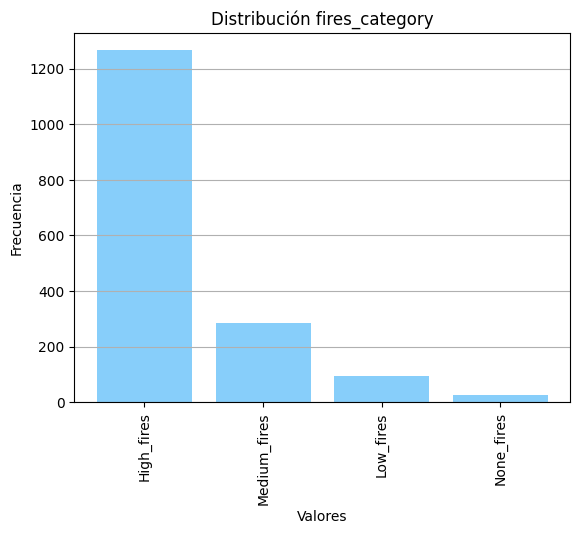

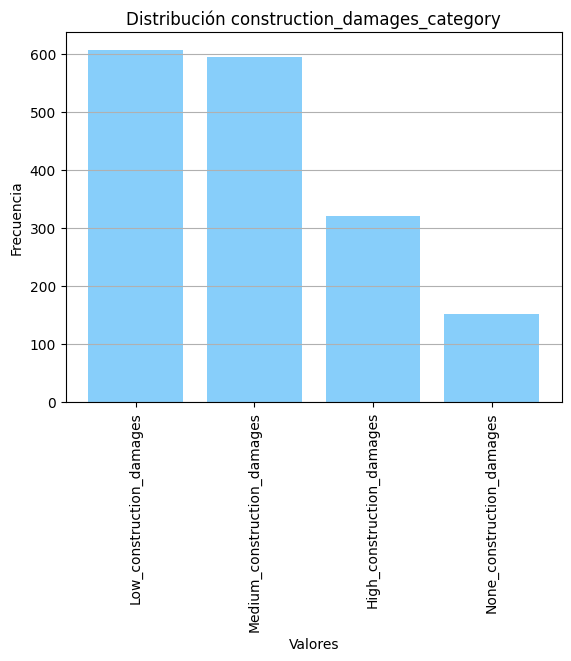

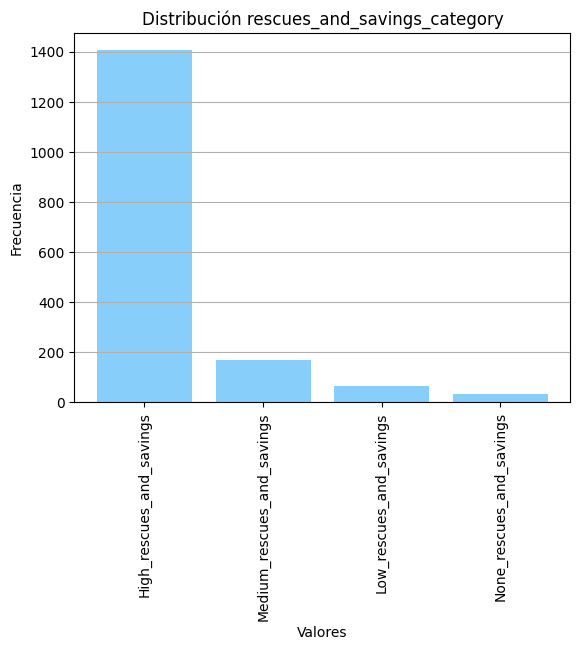

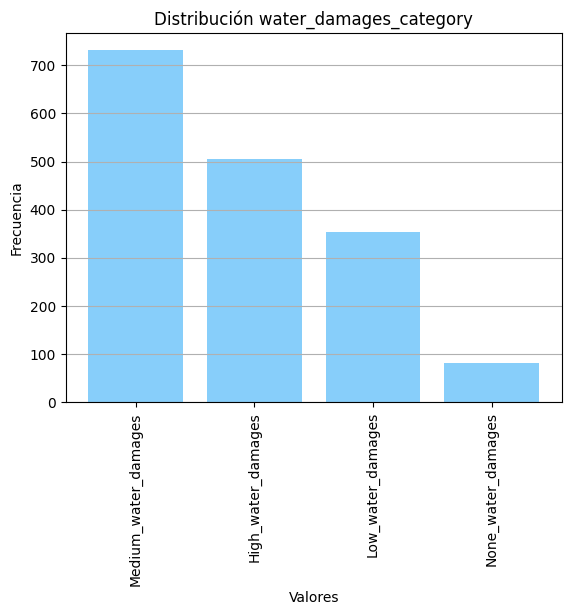

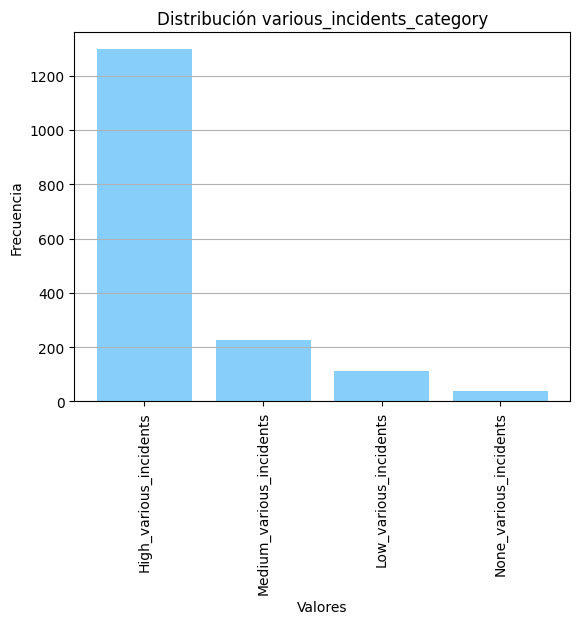

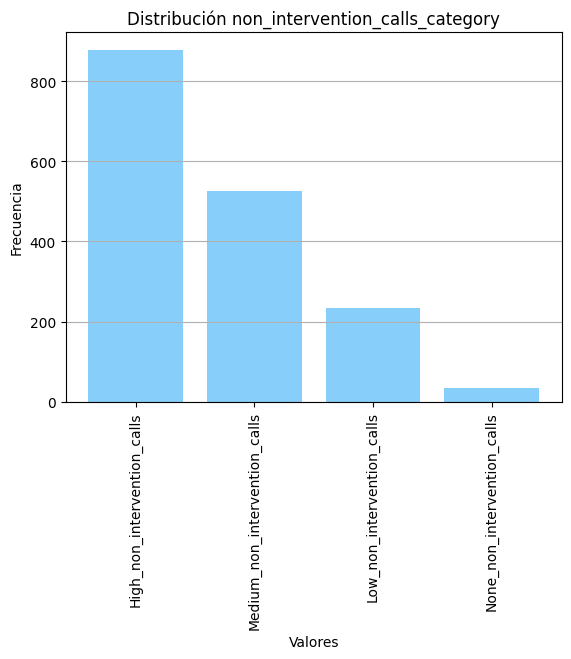

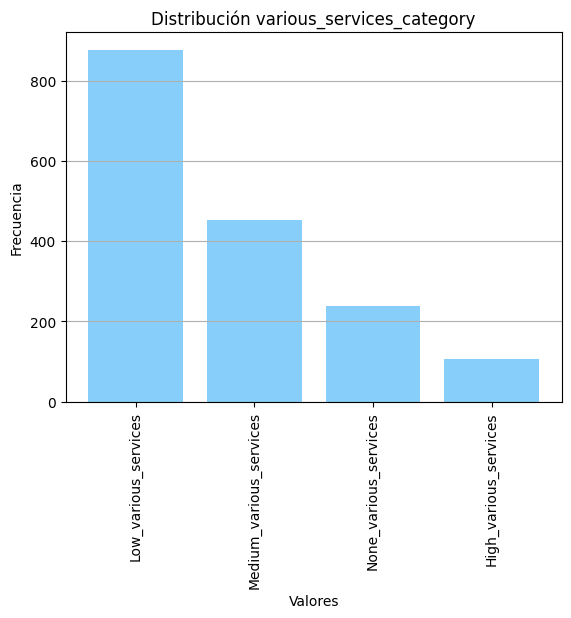

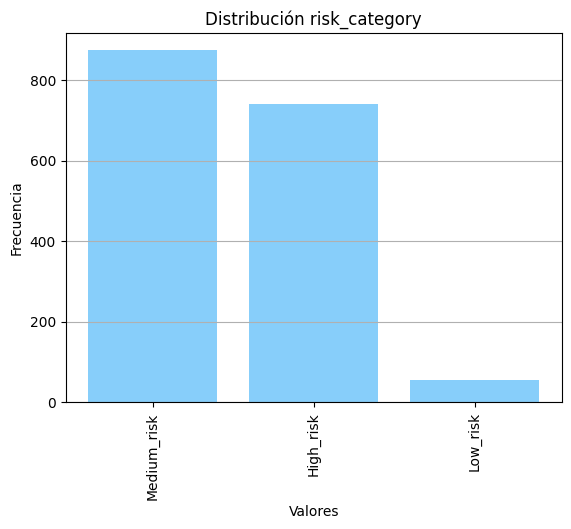

In [ ]:
# Frecuencia de los k = 1
for col in data_transactions.columns:
    col_count = data_transactions[col].value_counts()
    plt.bar(col_count.index, col_count.values, color='lightskyblue')

    # Añadir títulos y aspectos del gráfico
    plt.title('Distribución ' + col)
    plt.xlabel('Valores')
    plt.xticks(rotation=90)
    plt.ylabel('Frecuencia')
    plt.grid(axis='y')
    plt.show()


estudio k > 2


algoritmos varios a priori

In [ ]:
# Función para convertir las lista de items de una regla en un string
# input: rule_info: frozenset de items
# output: string
def get_rule_component(rule_info):

  items = list(rule_info)
  result = items[0]

  for i in range(1, len(items)):
    result += ' and ' + items[i]

  return result

In [ ]:
# Función para mostrar por pantalla los k-itemsets frecuentes y las
# reglas de asociación derivadas de ellos, donde k>2
# input:
# itemset: lista que contiene el resultado del algoritmo apriori de sklearn
# level: k-itemset frecuente mínimo desde el que mostrar las reglas

def print_itemset(itemset, level = 2):

  items = list(itemset[0])

  if (len(items) >= level):

    print('itemset = ' + str(items))
    print('support = ' + str(itemset[1]))
    print('rules')
    print('')

    for rule in itemset[2]:

      if not rule.items_base:
         continue

      antecedent = get_rule_component(rule.items_base)
      consequent = get_rule_component(rule.items_add)

      print(antecedent + ' => ' + consequent)
      print('Confidence = ' + str(rule.confidence))
      print('Lift = ' + str(rule.lift))
      print('')


    print("=====================================")


In [ ]:
# Función para
# input: itemsets: lista que contiene el resultado del algoritmo apriori de sklearn
# output: DataFrame de pandas con los atributos:
#         freqItemset = la lista de items del k-itemset frecuente
#         freqItemset_len = k
#         support = suporte del k-itemset
#         antecedent = antecedente de la regla
#         consequent = consecuente de la regla
#         confidence = confianza de la regla
#         lift = lift de la regla

def itemset_to_DataFrame (itemsets):
    freqItemset = list()
    freqItemset_len = list()
    support = list()
    antecedent = list()
    consequent = list()
    confidence = list()
    lift = list()

    for item in itemsets:
        if len(item.items)<2:
           continue
        for rule in item.ordered_statistics:
            if not rule.items_base:
               continue

            freqItemset.append(item.items)
            freqItemset_len.append(len(item.items))
            support.append(item.support)
            antecedent.append(list(rule.items_base))
            consequent.append(list(rule.items_add))
            confidence.append(rule.confidence)
            lift.append(rule.lift)

    result = pd.DataFrame({'freqItemset_len':freqItemset_len,
                                'freqItemset':freqItemset,
                                'support':support,
                                'antecedent':antecedent,
                                'consequent':consequent,
                                'confidence':confidence,
                                'lift':lift})
    return result


In [ ]:
def frequent_itemset_filter(df, value, location='both'):
    """
    Filters a DataFrame to find rows where 'consequent' or 'antecedent' contain a specific value.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the columns 'consequent' and 'antecedent'.
    value (str): The value to search for within 'consequent' or 'antecedent'.
    location (str, optional): Determines where to search for the value.
        Options: 'c' (only in consequent),
                 'a' (only in antecedent),
                 'both' (default, searches in both).

    Returns:
    pd.DataFrame: A new DataFrame filtered with rows where the value appears in the specified location.
    """

    match location:
        case 'c':  # Search only in the 'consequent' column
            df['consequent'] = df['consequent'].astype(str)
            df_filtered = df[df['consequent'].str.contains(value, na=False)]

        case 'a':  # Search only in the 'antecedent' column
            df['antecedent'] = df['antecedent'].astype(str)
            df_filtered = df[df['antecedent'].str.contains(value, na=False)]

        case 'both':  # Search in both 'consequent' and 'antecedent' columns
            df['consequent'] = df['consequent'].astype(str)
            df['antecedent'] = df['antecedent'].astype(str)
            df_filtered = df[
                df['consequent'].str.contains(value, na=False) |
                df['antecedent'].str.contains(value, na=False)
            ]

        case _:  # Default case if an invalid option is provided
            raise ValueError("Invalid location. Use 'c', 'a', or 'both'.")

    return df_filtered


PARTE 2

In [1]:
# Función para filtrar itemsets frecuentes de tamaño k y devolver su soporte
def get_support_for_k(itemsets_df, k):
    """
    Filtra los itemsets frecuentes de tamaño k y devuelve el soporte.

    Parámetros:
    itemsets_df (DataFrame): Tabla con los itemsets frecuentes y sus métricas.
    k (int): Tamaño del conjunto de ítems que queremos filtrar.

    Retorna:
    DataFrame con los itemsets de tamaño k y su soporte.
    """
    # Filtramos por la columna 'freqItemset_len' que indica el tamaño del conjunto de ítems
    filtered_df = itemsets_df[itemsets_df["freqItemset_len"] == k][["freqItemset", "support"]]

    return filtered_df

# Ejemplo de uso:
# Suponiendo que tenemos el DataFrame `frequent_itemsets_df` con los itemsets ya calculados
k = 1  # Podemos cambiar este valor para obtener itemsets de diferente tamaño
filtered_support = get_support_for_k(frequent_itemsets_df, k)

# Mostramos los resultados
print(filtered_support)


NameError: name 'frequent_itemsets_df' is not defined